In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

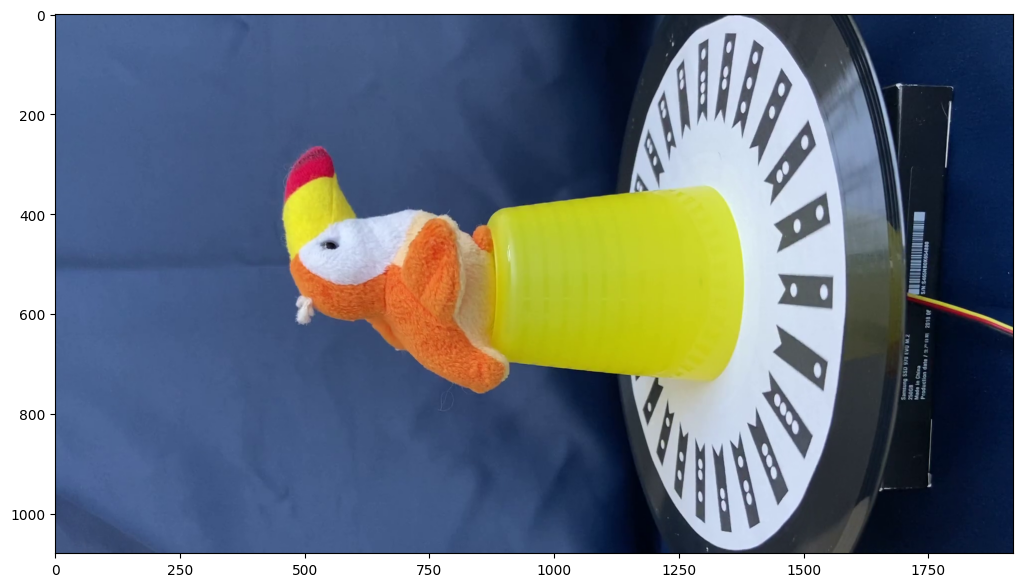

In [2]:
image = cv.imread("./assignment1_test_dataset/obj01/000000.png").astype(np.uint8)

rgb_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
hsv_img = cv.cvtColor(image, cv.COLOR_BGR2HSV)
yuv_img = cv.cvtColor(image, cv.COLOR_BGR2YUV)

plt.figure(figsize=(15,7))
plt.imshow(rgb_img)

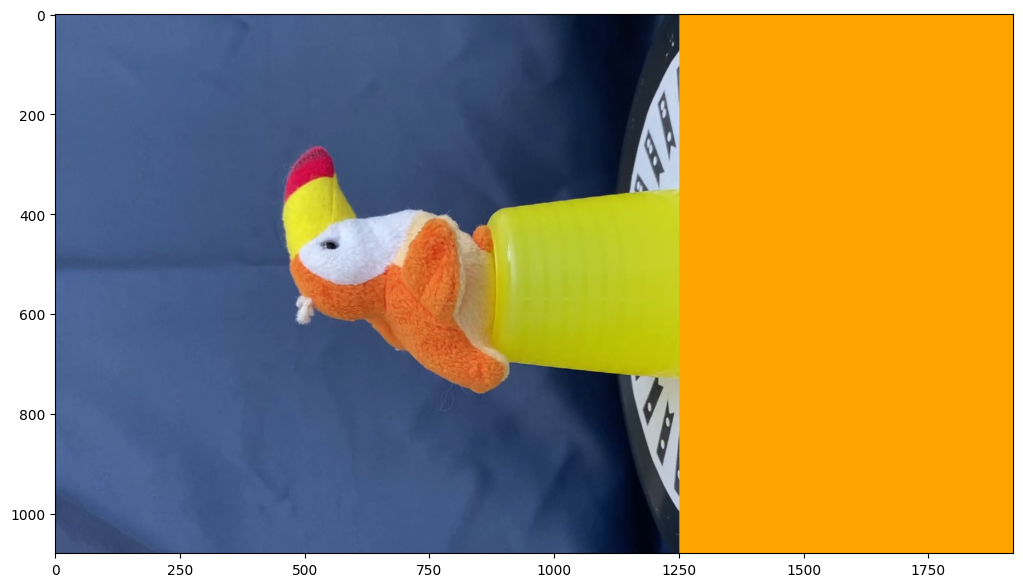

In [3]:
rgb_img = cv.rectangle(rgb_img, (1250,0), (image.shape[1], image.shape[0]), (255,165,0), -1)

plt.figure(figsize=(15,7))
plt.imshow(rgb_img)

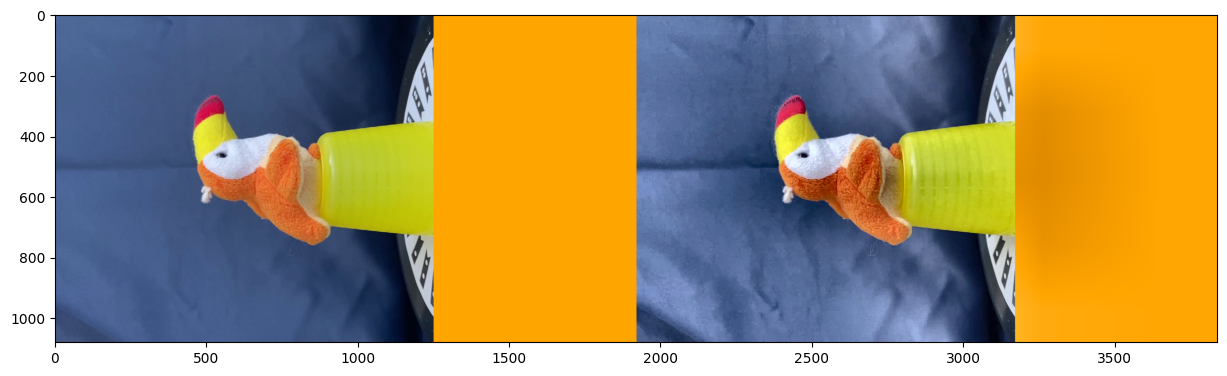

In [4]:
lab = cv.cvtColor(rgb_img, cv.COLOR_RGB2LAB)
l_channel, a, b = cv.split(lab)

# Applying CLAHE to L-channel
l_clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(5,5))
l_channel = l_clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv.merge((l_channel,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv.cvtColor(limg, cv.COLOR_LAB2RGB)


# Stacking the original image with the enhanced image
result = np.hstack((rgb_img, enhanced_img))
plt.figure(figsize=(15,7))
plt.imshow(result)

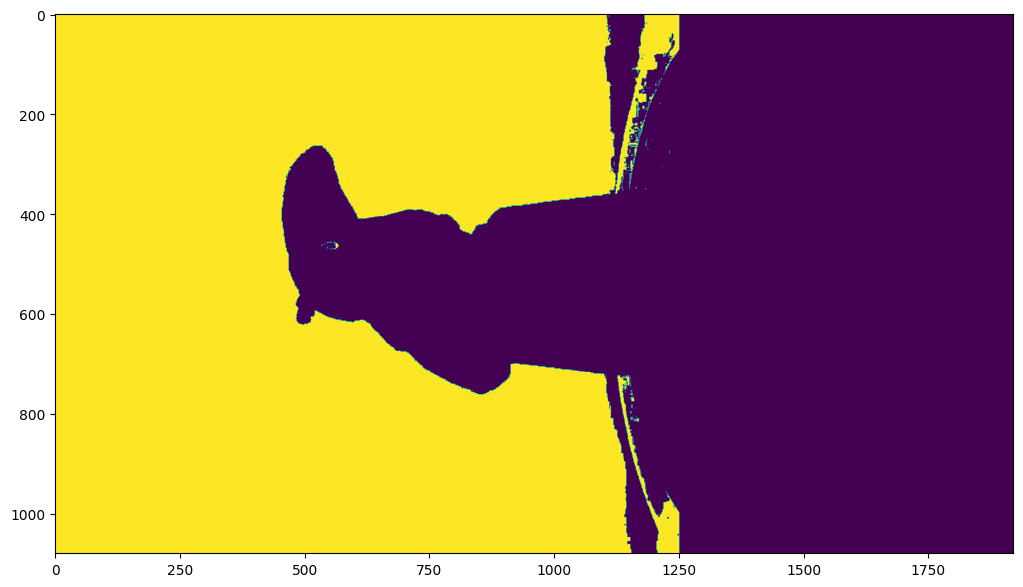

In [5]:
# lower blu - upper blu
thresh = cv.inRange(cv.cvtColor(enhanced_img, cv.COLOR_RGB2HSV), np.array([100,70,40]), np.array([130,255,255]))

plt.figure(figsize=(15,7))
plt.imshow(thresh)

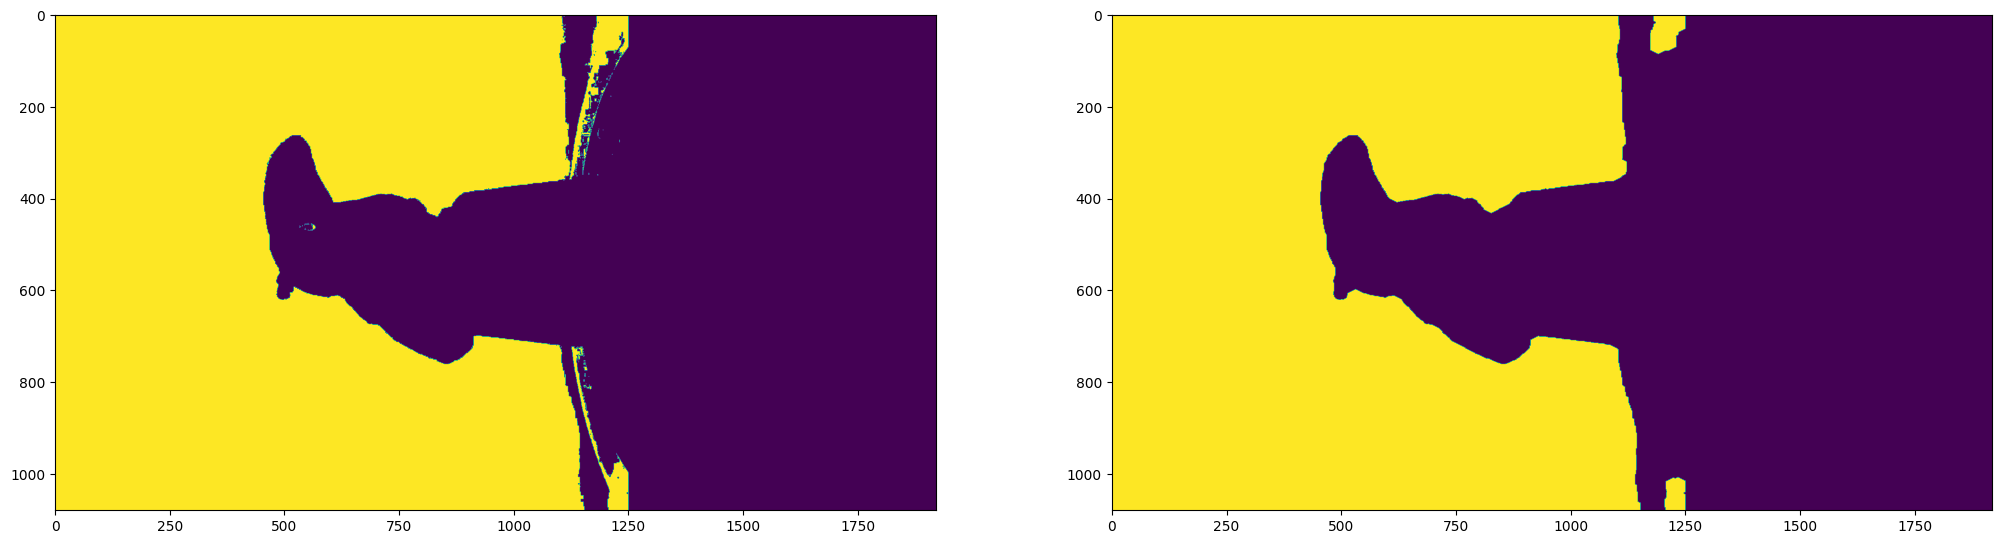

In [6]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
#kernel = np.ones((5,5), np.uint8)

#erosion = cv.erode(thresh, kernel, iterations = 2)#2
closing = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=8)


plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
plt.imshow(thresh)
plt.subplot(2,2,2)
plt.imshow(closing)

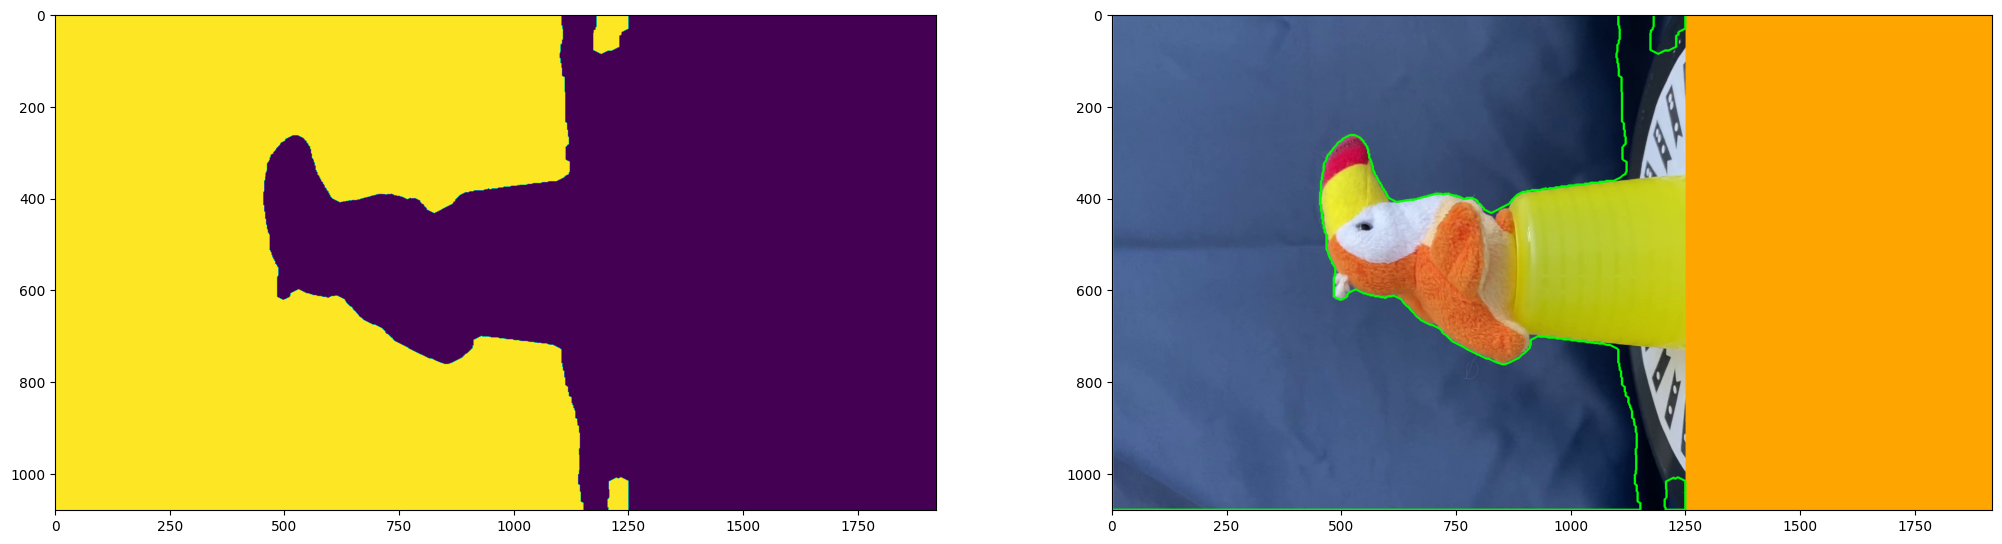

In [7]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

opening = cv.morphologyEx(closing, cv.MORPH_CLOSE, kernel, iterations = 5)

contours, hierarchy = cv.findContours(opening, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(rgb_img, contours, -1, (0,255,0), 3)

plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
plt.imshow(opening)
plt.subplot(2,2,2)
plt.imshow(rgb_img)
